<a href="https://colab.research.google.com/github/Sakkiya/Analzed_Files-/blob/main/Random%20Forest%20model_Project_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,log_loss

In [2]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving project_risk_raw_dataset.csv to project_risk_raw_dataset.csv


In [3]:
df = pd.read_csv('project_risk_raw_dataset.csv')

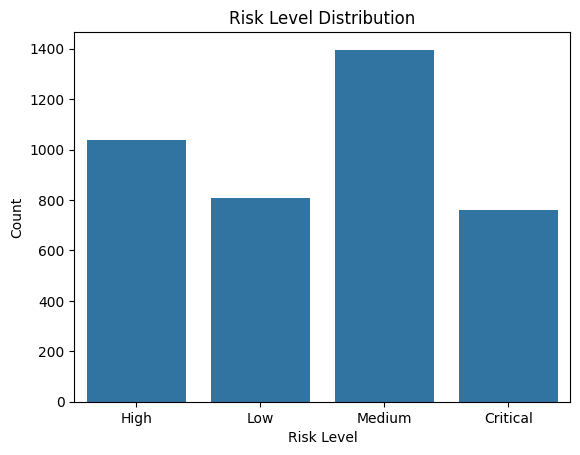

In [4]:
# Target distribution
sns.countplot(x='Risk_Level', data=df)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()


In [5]:
df

,Project_ID,Project_Type,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,...,Industry_Volatility,Client_Experience_Level,Change_Control_Maturity,Risk_Management_Maturity,Team_Colocation,Documentation_Quality,Project_Start_Month,Current_Phase_Duration_Months,Seasonal_Risk_Factor,Risk_Level
0,PROJ_0001,Construction,32,1526276.55,32,9.70,16,Waterfall,Senior,3,...,Extreme,First-time,Basic,Basic,Fully Colocated,Good,10,5,1.0,High
1,PROJ_0002,Manufacturing,2,390790.15,9,2.72,9,Kanban,Mixed,0,...,Stable,Occasional,Advanced,Formal,Fully Remote,Poor,9,3,1.0,Low
2,PROJ_0003,Manufacturing,2,246674.76,6,2.04,7,Agile,Mixed,1,...,Stable,Regular,NaN,NaN,Hybrid,Good,5,1,1.0,Medium
3,PROJ_0004,IT,12,1427830.63,17,7.54,16,Scrum,Mixed,0,...,Extreme,Strategic,Formal,Basic,Hybrid,Basic,12,6,1.1,High
4,PROJ_0005,Construction,24,1696746.64,24,6.68,17,Hybrid,Junior,0,...,Moderate,Occasional,Basic,NaN,Partially Colocated,Basic,9,6,1.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,PROJ_3996,IT,9,731548.97,14,5.40,9,Agile,Senior,4,...,Moderate,Occasional,NaN,NaN,Hybrid,Basic,10,1,1.1,High
3996,PROJ_3997,Healthcare,9,492981.40,9,2.69,8,Waterfall,Senior,5,...,Stable,Occasional,NaN,Basic,Hybrid,Basic,9,1,1.0,Medium
3997,PROJ_3998,IT,12,1097040.65,24,8.82,10,Kanban,Junior,2,...,Moderate,Regular,NaN,Basic,Fully Remote,Basic,3,4,1.0,High
3998,PROJ_3999,R&D,26,2900977.55,28,10.00,26,Scrum,Junior,1,...,High,Strategic,Basic,Formal,Fully Remote,Good,1,10,1.0,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Project_ID                       4000 non-null   object 
 1   Project_Type                     4000 non-null   object 
 2   Team_Size                        4000 non-null   int64  
 3   Project_Budget_USD               4000 non-null   float64
 4   Estimated_Timeline_Months        4000 non-null   int64  
 5   Complexity_Score                 4000 non-null   float64
 6   Stakeholder_Count                4000 non-null   int64  
 7   Methodology_Used                 4000 non-null   object 
 8   Team_Experience_Level            4000 non-null   object 
 9   Past_Similar_Projects            4000 non-null   int64  
 10  External_Dependencies_Count      4000 non-null   int64  
 11  Change_Request_Frequency         4000 non-null   float64
 12  Project_Phase       

In [7]:
df.describe()

,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Past_Similar_Projects,External_Dependencies_Count,Change_Request_Frequency,Team_Turnover_Rate,Vendor_Reliability_Score,...,Market_Volatility,Integration_Complexity,Resource_Availability,Organizational_Change_Frequency,Cross_Functional_Dependencies,Previous_Delivery_Success_Rate,Technical_Debt_Level,Project_Start_Month,Current_Phase_Duration_Months,Seasonal_Risk_Factor
count,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,15.388250,1.143032e+06,17.147750,6.192525,11.130500,1.973750,3.127750,1.638080,0.292725,0.712087,...,0.49716,5.573585,0.651695,1.212215,3.549250,0.750437,0.17544,6.492500,4.074500,1.011325
std,9.220969,5.908781e+05,6.926609,2.212538,4.425875,1.750093,1.609216,1.170451,0.166546,0.163418,...,0.28702,2.606654,0.201163,0.969191,2.320004,0.143712,0.29682,3.476416,2.883926,0.031694
min,2.000000,1.593555e+05,2.000000,1.620000,2.000000,0.000000,0.000000,0.010000,0.000000,0.090000,...,0.00000,1.000000,0.300000,0.000000,0.000000,0.150000,0.00000,1.000000,1.000000,1.000000
25%,9.000000,6.925329e+05,12.000000,4.460000,8.000000,1.000000,2.000000,0.760000,0.160000,0.600000,...,0.25000,3.317500,0.480000,0.500000,2.000000,0.660000,0.00000,4.000000,2.000000,1.000000
50%,13.000000,1.007472e+06,17.000000,6.015000,10.000000,2.000000,3.000000,1.370000,0.270000,0.730000,...,0.50000,5.600000,0.650000,0.960000,4.000000,0.770000,0.00000,7.000000,3.000000,1.000000
75%,20.000000,1.475870e+06,22.000000,7.862500,14.000000,3.000000,4.000000,2.230000,0.400000,0.840000,...,0.74000,7.860000,0.820000,1.660000,6.000000,0.860000,0.28000,10.000000,6.000000,1.000000
max,50.000000,3.768354e+06,36.000000,10.000000,29.000000,10.000000,7.000000,8.840000,0.850000,1.000000,...,1.00000,10.000000,1.000000,8.230000,7.000000,0.990000,1.00000,12.000000,17.000000,1.100000


In [8]:
print(df.columns)

Index(['Project_ID', 'Project_Type', 'Team_Size', 'Project_Budget_USD',
       'Estimated_Timeline_Months', 'Complexity_Score', 'Stakeholder_Count',
       'Methodology_Used', 'Team_Experience_Level', 'Past_Similar_Projects',
       'External_Dependencies_Count', 'Change_Request_Frequency',
       'Project_Phase', 'Requirement_Stability', 'Team_Turnover_Rate',
       'Vendor_Reliability_Score', 'Historical_Risk_Incidents',
       'Communication_Frequency', 'Regulatory_Compliance_Level',
       'Technology_Familiarity', 'Geographical_Distribution',
       'Stakeholder_Engagement_Level', 'Schedule_Pressure',
       'Budget_Utilization_Rate', 'Executive_Sponsorship', 'Funding_Source',
       'Market_Volatility', 'Integration_Complexity', 'Resource_Availability',
       'Priority_Level', 'Organizational_Change_Frequency',
       'Cross_Functional_Dependencies', 'Previous_Delivery_Success_Rate',
       'Technical_Debt_Level', 'Project_Manager_Experience',
       'Org_Process_Maturity', 'Dat

In [9]:
df['Risk_Level'].unique()


array(['High', 'Low', 'Medium', 'Critical'], dtype=object)

In [10]:
# Split 25% for validation, keeping 75% for training and testing
df_train_test, df_val = train_test_split(df, test_size=0.25, random_state=42, stratify=df['Risk_Level'])

In [11]:
print(f"Training and Testing Data Count: {df_train_test.shape[0]}")
print(f"Validation Data Count: {df_val.shape[0]}")

Training and Testing Data Count: 3000
Validation Data Count: 1000


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

def rf_model_training(df_train_test, df_val, n_estimators=100, max_depth=None, random_state=42):
    target_col = 'Risk_Level'
    drop_cols = ['product_id', 'seller_id', 'listing_date', target_col]
    feature_cols = [col for col in df_train_test.columns if col not in drop_cols]

    # Prepare training features
    X_train_test = df_train_test[feature_cols].copy()
    y_train_test = df_train_test[target_col].copy()

    X_val_data = df_val[feature_cols].copy()
    y_val_data = df_val[target_col].copy()

    # Encode categorical features
    categorical_cols = X_train_test.select_dtypes(include=['object', 'bool']).columns.tolist()
    X_train_test = pd.get_dummies(X_train_test, columns=categorical_cols, drop_first=True)
    X_val_data = pd.get_dummies(X_val_data, columns=categorical_cols, drop_first=True)

    # Align columns
    X_val_data = X_val_data.reindex(columns=X_train_test.columns, fill_value=0)

    # Initialize and train Random Forest
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model.fit(X_train_test, y_train_test)

    # Predictions
    y_val_pred = model.predict(X_val_data)
    y_val_prob = model.predict_proba(X_val_data)

    # Evaluation
    print("\nValidation Dataset Performance\n" + "#"*80)
    print(f"Accuracy: {accuracy_score(y_val_data, y_val_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_val_data, y_val_pred, average='weighted') * 100:.2f}%")
    print(f"Recall: {recall_score(y_val_data, y_val_pred, average='weighted') * 100:.2f}%")
    print(f"F1 Score: {f1_score(y_val_data, y_val_pred, average='weighted') * 100:.2f}%")
    print(f"Validation Log Loss: {log_loss(y_val_data, y_val_prob):.4f}")

    return model, y_val_data, y_val_pred

# Usage
df_train_test, df_val = train_test_split(df, test_size=0.25, random_state=42, stratify=df['Risk_Level'])
rf_model, y_val, y_val_pred = rf_model_training(df_train_test, df_val, n_estimators=100, max_depth=None)



Validation Dataset Performance
################################################################################
Accuracy: 44.00%
Precision: 47.35%
Recall: 44.00%
F1 Score: 40.48%
Validation Log Loss: 1.2063


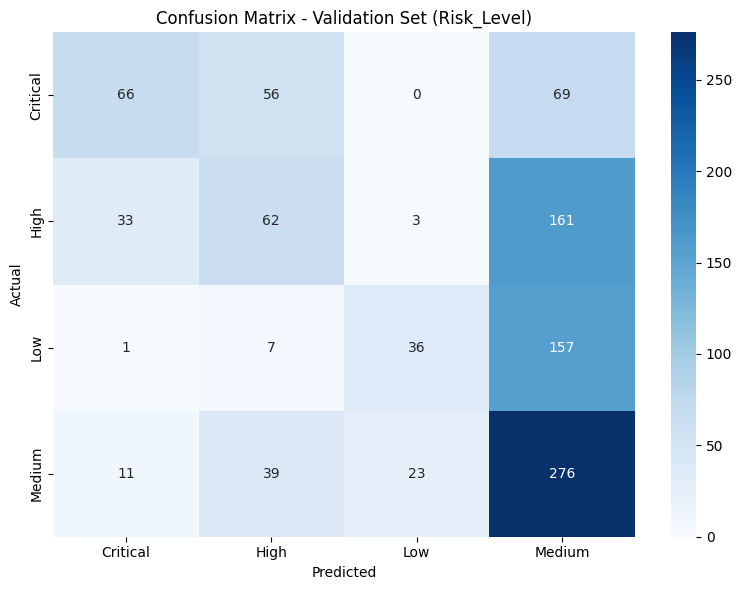

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Random Forest predictions
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Get class labels from Risk_Level
labels = sorted(y_val.unique())  # Automatically get unique Risk_Level classes

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Validation Set (Risk_Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [14]:
# Distribution of actual target in the dataset
print("Actual class distribution:")
print(df['Risk_Level'].value_counts(normalize=True))

# Distribution of Random Forest predictions on validation set
print("\nPredicted class distribution (Random Forest):")
print(pd.Series(y_val_pred).value_counts(normalize=True))


Actual class distribution:
Risk_Level
Medium      0.3490
High        0.2590
Low         0.2015
Critical    0.1905
Name: proportion, dtype: float64

Predicted class distribution (Random Forest):
Medium      0.663
High        0.164
Critical    0.111
Low         0.062
Name: proportion, dtype: float64


In [15]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7aa2b3f9065e535f49885ff0d7f3dca5d4c71327e78e4ff799f4617aab51341a
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
